## Generative Model for Synchrotron Emission from Relativistic Jets

Radio interferometers generate raw data in the form of correlated visilibility ((u,v) data), or Fourier transforms of the sky brightness distribution. An inverse Fourier transform can then be computed in order to obtain an image of the sky. 

The visibility function for a two element interferometer is given by 

\begin{equation}
V = \int I_{\nu} exp(-2\pi i \cdot \vec{b} \hat{s}/\lambda) d\Omega
\end{equation}


where $\vec{b}$ is the baseline length, $\hat{s}$ is the direction in which the antennas point, $I_{\nu}$ is the brightness distribution on the sky, $\lambda$ is the wavelength, and $d\Omega$ is the solid angle over which the source extends.


In beginning with the (u,v) data, there are a numer of error terms which arise. 

1. Additive errors due to interference ($\epsilon_{Int}$), cross-talk ($\epsilon_{CT}$), receiver noise ($\epsilon_{rx}$), and correlator offsets ($\epsilon_{fx}$). Interference in the form of fluctuating intensities and crosstalk, in which antennas in an array communicate with one another transmitting artificial data, lead to errors in the final image on large angular scales. In the case of receiver noise, deconvolution can lead to the redistribution of noise features across an image, confusing astrophysical sources with noise artifacts.


2. Multiplicative errors due to phase errors ($\epsilon_{\phi}$) from the atmosphere and ionosphere and errors in the calibration of amplitude or phase ($\epsilon_{GAIN}$).$ Varying indices of refraction across unique lines of sight to individual antennas can lead to phase delays which are not representative of the source structure. Errors which may arise in calibration of the amplitude and phase of each antenna will be convolved with the final image.


3. Bandwidth and Time-average smearing.  In practice, the frequency bandwidth of a visibility is singular, ie. corresponding to a single frequency. Since the passband of the antenna instead characterizes a range of frequencies, there is some resultant radial broadening of the image, ie. chromatic aberration ($\epsilon_{bs}$). Similarly, time-averaging of visibility functions leads to elongated structures in the image ($\epsilon_{ts}$).


4. Baseline errors. Baseline errors ($\epsilon_{BL}$)lead to baseline dependent offsets in the data. A distribution of varying baseline offsets will lead to an artifical sidelobe response that is baseline dependent.


5. Pointing errors. Errors in the pointing ($\epsilon_{pt}$)between antennas can lead to amplitude fluctuations that vary as a function of time.


6. Computational Errors.The Fast Fourier Transform (FFT) algorithm (used to obtain the final image) makes some approximations in determining the Fourier transform, and introduces additional effects ($\epsilon_{FFT}$) via implementation of aliasing and convolution within the algorithm. 


Our generative model for describing the synchrotron emission of a relativistic jet can therefore be written as



\begin{equation}
M_{gen}(F_\nu,\nu_a,\nu_m) = M(F_\nu,\nu_a,\nu_m) \prod_{\mathrm{antennas}} \epsilon_{bs} \epsilon_{pt} \epsilon_{FFT} \epsilon_{\phi} \epsilon_{ts} \epsilon_{GAIN} + \sum_{antennas} \epsilon_{Int} + \epsilon_{CT} + \epsilon_{rx} + \epsilon_{fx} + \epsilon_{BL}
\end{equation}


where M is the model which describes the synchrotron spectra as a function of the normalization flux factor $F_\nu$, the self absorption frequency $\nu_a$, and the characteristic elecron frequency $\nu_m$. Due to the time-variable nature of the location of the break frequencies, the shape of the spectra changes depending on the relative nature of $\nu_a$ and $\nu_m$. When $\nu_m$ is greater than $\nu_a$, the spectrum is given by


\begin{equation}
F_1 = F_\nu \Bigg[\Big(\frac{\nu}{\nu_a}\Big)^{-s_1\beta_1} + \Big(\frac{\nu}{\nu_a}\Big)^{-s_2\beta_2}\Bigg] \Bigg[1 + \Big(\frac{\nu}{\nu_m}\Big)^{s_2(\beta_2-\beta_3)}\Bigg]^{-1/s_2}
\end{equation}

where $s_1$ and $s_2$ are smoothing parameters which describe the spectrum across each break, and $\beta_1$, $\beta_2$, and $\beta_3$ are the power law indices for each region of the spectrum. As $\nu_a$ evolves and becomes greater than $\nu_m$, the shape of the spectrum can no longer be characterized by the above model, and is instead best described by 

\begin{equation}
F_2 = F_\nu \Bigg[ \Big(\frac{\nu}{\nu_m}\Big)^2 exp\Big[-s \Big(\frac{\nu}{\nu_m}\Big)^{2/3}\Big] +  \Big(\frac{\nu}{\nu_m}\Big)^{5/2}\Bigg] \times \Bigg[1 + \Big(\frac{\nu}{\nu_a}\Big)^{-s_2 (\beta_2 - \beta_3)}\Bigg]^{-1/s_2}
\end{equation}


When $\nu_a$ and $\nu_m$ are sufficiently far apart, the spectra are well constrained by the above equations. As the frequencies evolve ($\nu_a$ moves to higher frequencies as $\nu_m$ decreases), neither individual spectra is appropriate. We therefore adopt a weighting scheme given by 

\begin{equation}
F(F_\nu,\nu_a,\nu_m) = \frac{F_1\frac{\nu_m}{\nu_a}^2 + F_2\frac{\nu_a}{\nu_m}^2}{\frac{\nu_a}{\nu_m}^2 + \frac{\nu_m}{\nu_a}^2}.
\end{equation}

Depending on the relative nature of either break frequency, each individual spectra contributes to the total observed spectrum accordinly.


Given that the errors can be described as Guassian random processes, we arrive at our familiar result for the likelihood function.

\begin{equation}
\mathcal{L}(F_\nu,\nu_a,\nu_m) \propto \prod_{i=1}^N \exp(-\frac{(d_i-M_{gen}(F_\nu,\nu_a,\nu_m))^2}{2 \sigma_i^2})
\end{equation}

For the purposes of this repository, the errors which apply to the raw visibilities have been propagated through to final flux density measurements (in mJy) and their respective uncertainties. Therefore, modeling of the data will in practice entail comparing the flux density measurements directly to the synchrotron model, with an additional term which describes the fractional amount f by which the variances are underestimated. The complete log likelihood function is therefore given by 

\begin{equation}
ln p(y|x,\sigma,F_\nu,\nu_a,\nu_m, f) = -\frac{1}{2}\sum_{n} \frac{(y_n - F(F_\nu,\nu_a,\nu_m))^2 + ln 2\pi(\sigma_n^2 + f^2 F(F_\nu,\nu_a,\nu_m)^2 )}{\sigma_n^2 + f^2 F(F_\nu,\nu_a,\nu_m)^2 }
\end{equation}

where $F_\nu,\nu_a,\nu_m$ are the inferred values.

In [1]:
import syncmcmc
from syncmcmc import all_classes
from syncmcmc.all_classes import FluxFrequencyPriors, UniformPrior,FluxFrequencyPriorsCombinedSpectrum
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emcee
sns.set_style("white")
%matplotlib inline

# Load data

flux = []
freqs = []
error = []

for line in open('syncmcmc/data/Sw1644+57_126days'):
   lines = line.strip()
   if not line.startswith("#"):
      columns = line.split(',')
      freqs.append(columns[0])
      flux.append(columns[1])
      error.append(columns[2].rstrip('\n'))

flux = np.array(flux).astype(float)
freqs = np.array(freqs).astype(float)
error = np.array(error).astype(float)

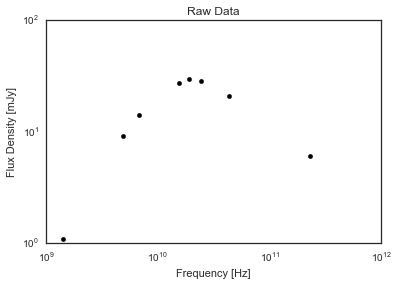

In [30]:
plt.scatter(freqs,flux,color='k')
plt.xscale('log')
plt.yscale('log')
plt.title('Raw Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Flux Density [mJy]')
plt.show()

Here we define three separate models: 1. Spectrum 1 when $\nu_a$ < $\nu_m$, 2. Spectrum 2 where $\nu_m$ < $\nu_a$, and 3. A weighted spectrum where the flux normalization factors in Spectrum 1 and Spectrum 2 are equal.

In [42]:
# Define known parameters

p = 2.5
epsilon_e = 0.1 * (p-2.)/(p-1.)
epsilon_b = 0.1


# Spectral slopes

beta_1 = 2.
beta_2 = 1./3.
beta_3 = (1.-p)/2.
beta5_1 = 5.0/2.0
beta5_2 = (1.0 - p)/2.0



# Shape of spectrum at each break

s_1 = 1.5
s_2 = (1.76 + 0.05*p)
s_3 = (0.8 - 0.03*p)
s_4 = 3.63 * p - 1.60
s_5 = 1.25 - 0.18 * p

In [43]:
# Define synchrotron spectrum for model 1 in Granot and Sari

def spectrum(v,F_v,v_a,v_m):
    return F_v * (((v/v_a)**(-s_1*beta_1) + (v/v_a)**(-s_1*beta_2))**(-1./s_1)) * ((1 + (v/v_m)**(s_2*(beta_2-beta_3)))**(-1./s_2))


## Define synchrotron spectrum for model 2 in Granot and Sari

def spectrum_2(v,F_v,v_a,v_m):
    phi = (v/v_m)
    return F_v * (((phi)**(2.)) * np.exp(- s_4 * phi**(2./3.)) + phi**(5./2.) ) * ((1 + (v/v_a)**(s_5*(beta5_1-beta5_2)))**(-1./s_5))

## Define weighted synchrotron spectrum with flux normalization factors equal

def weighted_spectrum(v,F_v,v_a,v_m):
    phi = (v/v_m)
    return ((v_m/v_a)**2. * (F_v * (((v/v_a)**(-s_1*beta_1) + (v/v_a)**(-s_1*beta_2))**(-1./s_1)) * ((1 + (v/v_m)**(s_2*(beta_2-beta_3)))**(-1./s_2))) + (v_a/v_m)**2. * F_v * ((((phi)**(2.)) * np.exp(- s_4 * phi**(2./3.)) + phi**(5./2.) ) * ((1 + (v/v_a)**(s_5*(beta5_1-beta5_2)))**(-1./s_5))))/((v_a/v_m)**2. + (v_m/v_a)**2.)


Next, we define the log likelihood function as given above for each model, and define a set of uniform priors motivated by physical assumptions of the parameters.

In [36]:
# Log likelihood function

def lnlike(theta, v, y, yerr):
    F_v,v_a,v_m,lnf = theta
    model = spectrum(v,F_v,v_a,v_m)
    inv_sigma2 = 1.0 / (yerr**2 + model**2 * np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))


def lnlike_spec2(theta, v, y, yerr):
    F_v,v_a,v_m,lnf = theta
    model = spectrum_2(v,F_v,v_a,v_m)
    inv_sigma2 = 1.0 / (yerr**2 + model**2 * np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))


def lnlike_spec3(theta, v, y, yerr):
    F_v,v_a,v_m,lnf = theta
    model = weighted_spectrum(v,F_v,v_a,v_m)
    inv_sigma2 = 1.0 / (yerr**2 + model**2 * np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

# Define priors

priors = FluxFrequencyPriors(UniformPrior(1.,55.),
          UniformPrior(1E8,1E13),
          UniformPrior(1E8,1E13), 
          UniformPrior(-3,0.01))

We implement parallel tempered MCMC in order to sufficiently explore the posterior. We initilize the walkers in a Gaussian distribution centered about realisitc values for the parameters.

In [ ]:
# Define number of dimensions and number of walkers

ndim, nwalkers = 4, 100


# Define initial positions of walkers in phase space

frand = np.random.normal(loc=38,size=nwalkers,scale=0.1)
varand = np.random.normal(loc=1E10,size=nwalkers,scale=1.E3)
vmrand = np.random.normal(loc=1E10,size=nwalkers,scale=1.E3)
yerrand = np.random.normal(loc=-0.7,size=nwalkers,scale=0.1)

pos = np.column_stack((frand,varand,vmrand,yerrand)) 
pos_add_dim = np.expand_dims(pos,axis=0)
final_pos = np.repeat(pos_add_dim, 5, axis=0)


# Run MCMC sampler

sampler = emcee.PTSampler(5, nwalkers, ndim, lnlike, priors.lnprior, loglargs=[freqs,flux,error])
sams = sampler.run_mcmc(final_pos, 1000)


sampler_spec2 = emcee.PTSampler(5, nwalkers, ndim, lnlike_spec2, priors.lnprior, loglargs=[freqs,flux,error])
sams_spec2 = sampler_spec2.run_mcmc(final_pos, 1000)

sampler_spec3 = emcee.PTSampler(5, nwalkers, ndim, lnlike_spec3, priors.lnprior, loglargs=[freqs,flux,error])
sams_spec3 = sampler_spec3.run_mcmc(final_pos, 1000)

# Burn off initial steps

samples = sampler.chain[0,:, 500:, :].reshape((-1, ndim))

samples_spec2 = sampler_spec2.chain[0,:, 500:, :].reshape((-1, ndim))

samples_spec3 = sampler_spec3.chain[0,:, 500:, :].reshape((-1, ndim))

Here we plot the time series traces corresponding to the first model (Spectrum 1).

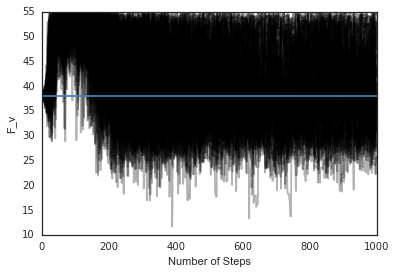

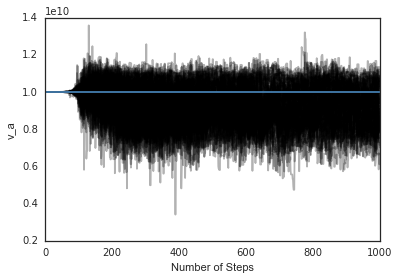

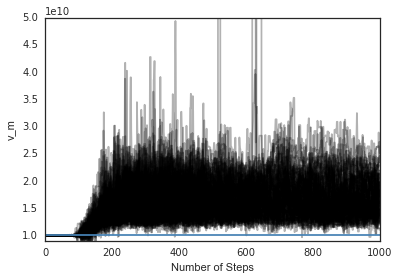

In [55]:
plt.plot(sampler.chain[0, :, :, 0].T,color="k", alpha=0.3)
plt.axhline(38, color='#4682b4')
plt.ylabel('F_v')
plt.xlabel('Number of Steps')

plt.figure()
plt.plot(sampler.chain[0,:, :, 1].T, color="k", alpha=0.3)
plt.axhline(1E10, color='#4682b4')
plt.ylabel('v_a')
plt.xlabel('Number of Steps')
   
plt.figure()
plt.plot(sampler.chain[0,:, :, 2].T, color="k", alpha=0.3)
plt.axhline(1E10, color='#4682b4')
plt.ylabel('v_m')
plt.ylim(0.9E10,5E10)
plt.xlabel('Number of Steps')
   

We find that the parameters do indeed converge after a burn in period of approximately 100 steps. We then take the parameters corresponding to the max of the log probability posterior and the "low temperature" results from the PT sampler. 

In [68]:
# Find parameters corresponding to max probability

maxprobs = sampler.chain[0,...][np.where(sampler.lnprobability[0,...] == sampler.lnprobability[0,...].max())].mean(axis=0)

maxprobs_spec2 = sampler_spec2.chain[0,...][np.where(sampler_spec2.lnprobability[0,...] == sampler_spec2.lnprobability[0,...].max())].mean(axis=0)

maxprobs_spec3 = sampler_spec3.chain[0,...][np.where(sampler_spec3.lnprobability[0,...] == sampler_spec3.lnprobability[0,...].max())].mean(axis=0)

F_mcmc, va_mcmc, vm_mcmc, lnf_mcmc = maxprobs
F_spec2_mcmc, va_spec2_mcmc, vm_spec2_mcmc, lnf_spec2_mcmc = maxprobs_spec2
F_spec3_mcmc, va_spec3_mcmc, vm_spec3_mcmc, lnf_spec3_mcmc = maxprobs_spec3

# Print results
print ("Inferred values for parameters for each model:")
print()
print ("F_v_spec1 = %s" % F_mcmc)
print ("v_a_spec1 = %s" % va_mcmc)
print ("v_m_spec1 = %s" % vm_mcmc)
print()
print ("F_v_spec2 = %s" % F_spec2_mcmc)
print ("v_a_spec2 = %s" % va_spec2_mcmc)
print ("v_m_spec2 = %s" % vm_spec2_mcmc)
print()
print ("F_v_spec3 = %s" % F_spec3_mcmc)
print ("v_a_spec3 = %s" % va_spec3_mcmc)
print ("v_m_spec3 = %s" % vm_spec3_mcmc)
print()

Inferred values for parameters for each model:

F_v_spec1 = 39.6342217244
v_a_spec1 = 9361136508.02
v_m_spec1 = 16330249335.7

F_v_spec2 = 54.6507595111
v_a_spec2 = 8974206355.4
v_m_spec2 = 8544769699.3

F_v_spec3 = 41.6683593694
v_a_spec3 = 9218609353.96
v_m_spec3 = 16693559877.9



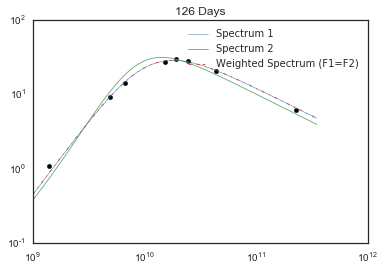

In [60]:
v_range = np.linspace(1E9,350E9,1E4)
plt.figure()
plt.scatter(freqs,flux,color='k')
plt.plot(v_range,spectrum(v_range,F_mcmc,va_mcmc,vm_mcmc),lw='0.5',label='Spectrum 1')
plt.plot(v_range,spectrum_2(v_range,F_spec2_mcmc,va_spec2_mcmc,vm_spec2_mcmc),lw='0.8',label='Spectrum 2')
plt.plot(v_range,weighted_spectrum(v_range,F_spec3_mcmc,va_spec3_mcmc,vm_spec3_mcmc),ls='-.',lw='0.9',label='Weighted Spectrum (F1=F2)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('126 Days')
plt.show()

We find that Spectrum 1 and our weighted spectrum do an adequate job of characterizing the data. Unsurprisingly, spectrum 2 falls short, which is consistent with the fact that $\nu_a$ is indeed less than $\nu_m$ at this epoch.